In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras.preprocessing import image

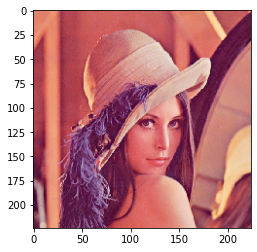

In [38]:
img = image.load_img('Lena.jfif', target_size=(224,224))
plt.imshow(img)
plt.show()

In [4]:
def MyModel():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(16,(3,3),padding='same')(inputs)
    x = Activation('relu')(x)
    x = Conv2D(16,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPool2D((2,2),2)(x)
    
    model = Model(inputs, x)
    return model

In [5]:
model = MyModel()
model.summary() #(batch, height, width, channel)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                             

In [39]:
in_img = image.img_to_array(img)
in_img = np.expand_dims(in_img,axis=0)
in_img /= 255.0

In [40]:
in_img.shape

(1, 224, 224, 3)

In [41]:
layer_names = ['conv2d','activation','conv2d_1',
               'activation_1','max_pooling2d']

layer_outputs = [model.get_layer(layer_name).output for layer_name in layer_names]

activation_model = Model(inputs=model.input,outputs=layer_outputs)

activations = activation_model.predict(in_img)

1/1 [==============================] - 0s 48ms/step


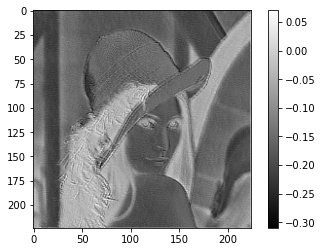

In [42]:
first_conv_layer = activations[0]
plt.imshow(first_conv_layer[0,:,:,6], cmap = 'gray')
plt.colorbar()
plt.show()

In [47]:
def show_layer(layer):
    n_filters = layer.shape[3]
    n_row = 4
    n_col = n_filters // n_row
    
    
    for i in range(1,n_filters+1):
        plt.subplot(n_row, n_col, i)
        plt.imshow(layer[0,:,:,i-1], cmap = 'gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

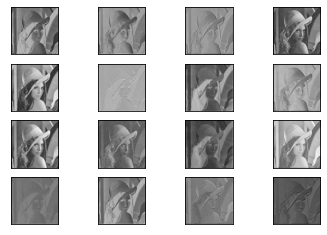

In [48]:
show_layer(first_conv_layer)

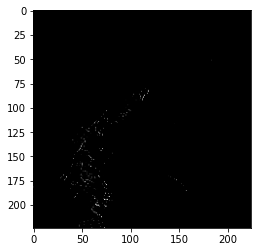

In [49]:
first_relu_layer = activations[1]
plt.imshow(first_relu_layer[0,:,:,6], cmap = 'gray')
plt.show()

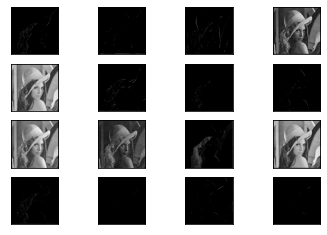

In [50]:
show_layer(first_relu_layer)

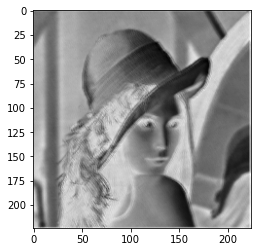

In [51]:
second_conv_layer = activations[2]
plt.imshow(second_conv_layer[0,:,:,6], cmap = 'gray')
plt.show()

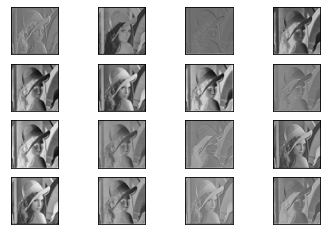

In [52]:
show_layer(second_conv_layer)

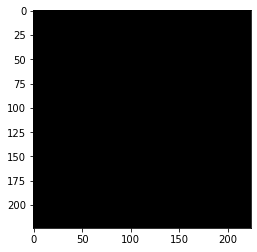

In [53]:
second_relu_layer = activations[3]
plt.imshow(second_relu_layer[0,:,:,6], cmap = 'gray')
plt.show()

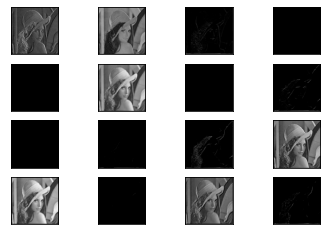

In [54]:
show_layer(second_relu_layer)

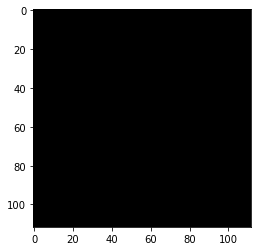

In [55]:
max_pooling_layer = activations[4]
plt.imshow(max_pooling_layer[0,:,:,6], cmap = 'gray')
plt.show()

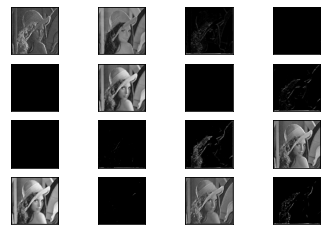

In [56]:
show_layer(max_pooling_layer)